En primer lugar cargamos el archivo y hacemos una estadística básica de las variables.

Este script se ha generado en Colaboratory, puede modificarse para correr directamente como Jupyter notebook

In [0]:
#from google.colab import files
#uploaded = files.upload()  # escoger el archivo que queremos utilizar, en este caso ejemploMI.csv que tiene los datos
import pandas as pd
df = pd.read_csv('ejemploMI.csv')

In [4]:
df.tail()  # verificamos que se ha cargado correctamente

,Unnamed: 0,X,exitus,apache2,tipopaciente,sexopac,edad,sofa,lactato
1360,1364,1364,0,24,QU,Hombre,68,5,1.9
1361,1365,1365,0,18,QP,Hombre,55,5,1.5
1362,1366,1366,0,13,QP,Hombre,68,2,4.9
1363,1367,1367,0,10,QU,Hombre,33,1,1.1
1364,1368,1368,0,8,QP,Hombre,64,4,4.8


Hacemos estadistica basica de las variables

In [5]:
df.describe()

,Unnamed: 0,X,exitus,apache2,edad,sofa,lactato
count,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000
mean,684.740659,684.740659,0.063736,16.082051,63.414652,3.802930,2.160293
std,394.620098,394.620098,0.244372,7.997012,15.952075,3.000976,2.197511
min,1.000000,1.000000,0.000000,1.000000,12.000000,0.000000,0.400000
25%,344.000000,344.000000,0.000000,10.000000,54.000000,1.000000,1.000000
50%,685.000000,685.000000,0.000000,14.000000,67.000000,3.000000,1.500000
75%,1026.000000,1026.000000,0.000000,20.000000,75.000000,6.000000,2.500000
max,1368.000000,1368.000000,1.000000,50.000000,102.000000,16.000000,26.400000


In [6]:
pd.crosstab(index=df["sexopac"],columns="pacientes")      

col_0,pacientes
sexopac,
Hombre,851
Mujer,514


In [8]:
print("Mortalidad en el grupo: ",df['exitus'].mean()*100,"%")
pd.crosstab(index=df["exitus"],columns="pacientes") 

Mortalidad en el grupo:  6.373626373626373 %


col_0,pacientes
exitus,
0,1278
1,87


La mortalidad en el grupo completo es del 6.4%. Esto significa que si predecimos a todos como vivos conseguiremos una tasa de aciertos del 93.6%. Esto es lo que tenemos que mejorar con nuestras predicciones.

In [9]:
pd.crosstab(index=df["tipopaciente"],columns="pacientes")     # medico, politrauma,quirurg programado y quirurg urgente

col_0,pacientes
tipopaciente,
M,394
PT,60
QP,726
QU,185


Como ejemplo grafico mostramos la distribucion de la variable edad y la variable lactato

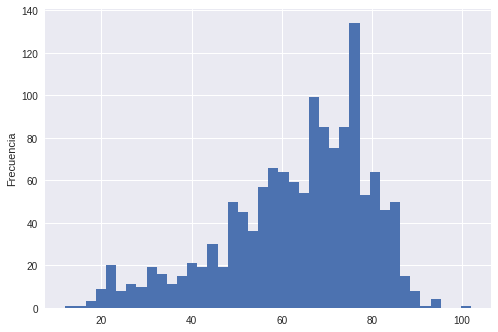

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.hist(df["edad"], bins=40)
plt.ylabel('Frecuencia')
plt.show()

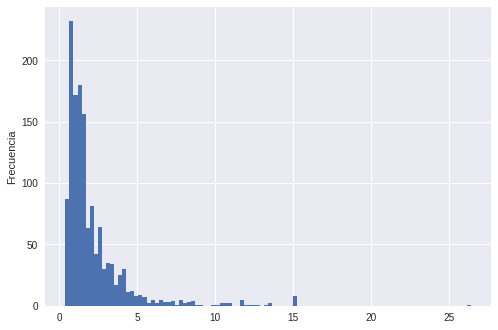

In [16]:
plt.hist(df["lactato"],bins=100)
plt.ylabel('Frecuencia')
plt.show()

Lactato máximo 15.0


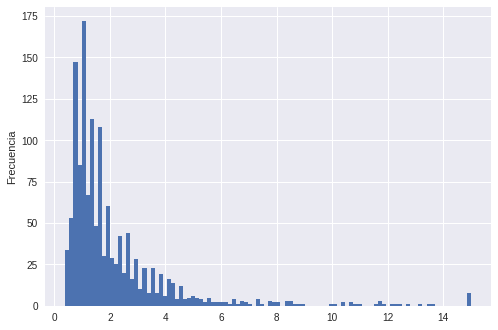

In [18]:
#Vemos que hay un valor de lactato que se sale de la capacidad de medición del gasómetro (hasta 15). Lo eliminamos ya que es un único valor
df=df[df['lactato']<=15]
print('Lactato máximo',df['lactato'].max())


plt.hist(df["lactato"],bins=100)
plt.ylabel('Frecuencia')
plt.show()